<a href="https://colab.research.google.com/github/kkkkkkk24/work/blob/main/generative__descriminative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #reshape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB #genertive class
from sklearn.linear_model import LogisticRegression #descriminative class
from sklearn.metrics import accuracy_score

In [ ]:
x , y= make_classification(
    n_samples=300, n_features =2,n_informative=2,n_redundant=0,
    n_clusters_per_class=1,flip_y=0.1,random_state=42,class_sep=1.5)
#strong relation with output - informative features
#redundant varivale - varibales made from informative_features
#2 classes 2 clusters , 1 cluster per each class
#y_flip = 0.1 - 10 percent output will be wrong


In [ ]:
x_train,xtest,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
gnb=GaussianNB() #input features are continous so guassian
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:

lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
def plot_decision_boundary_with_probs(model,x,y,ax,title,acc):
  x_min, x_max =x[:, 0].min() -1,x[:, 0].max() +1
  y_min, y_max =x[:, 1].min() -1,x[:, 1].max() +1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,200),
                       np.linspace(y_min,y_max,200))
  print(xx.shape)
  print(yy.shape)
#probablity for class 1
  z = model.predict_proba(np.c_[xx.ravel(),
                                yy.ravel()])[:, 1]
#converts metrics into vector ,
#np.c - combine
  z = z.reshape(xx.shape)

#probablity heatmap
  contour = ax.contourf(xx, yy, z, alpha=0.3, cmap=plt.cm.coolwarm)
  plt.colorbar(contour,ax=ax)

#decision boundary
  boundary = model.predict(np.c_[xx.ravel() , yy.ravel()]).reshape(xx.shape)
  ax.contour(xx, yy, boundary, colors='k', linewidths=1)

#data points - scatter plot
  ax.scatter(x[:, 0], x[:, 1], c=y ,edgecolor='k',cmap=plt.cm.coolwarm)
  ax.set_title(f"{title}\naAcurcay: {acc:.2f}")



In [ ]:
y_pred_gnb = gnb.predict(xtest)
y_pred_lr = lr.predict(xtest)
acc_gnb = accuracy_score(y_test,y_pred_gnb)
acc_lr = accuracy_score(y_test,y_pred_lr)

(200, 200)
(200, 200)
(200, 200)
(200, 200)


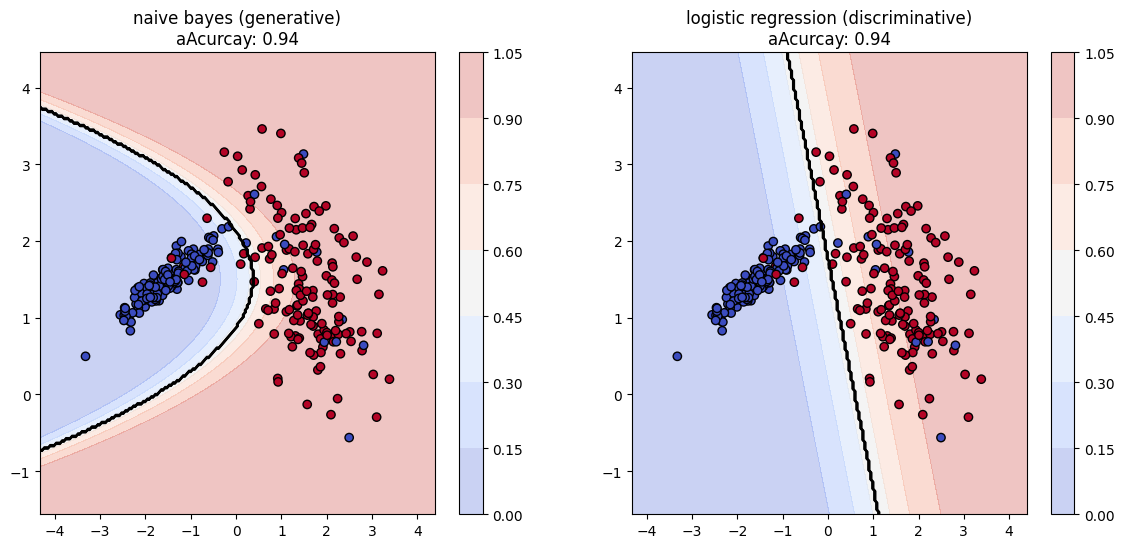

In [ ]:
fig , axs =plt.subplots(1,2 ,figsize=(14, 6))
plot_decision_boundary_with_probs(gnb,x,y,axs[0],"naive bayes (generative)", acc_gnb)


plot_decision_boundary_with_probs(lr,x,y,axs[1],"logistic regression (discriminative)", acc_lr)

plt.show()

In [ ]:
print(f"naive bayes accuracy: {acc_gnb:.4f}")
print(f"logistic regression accuracy: {acc_lr:.4f}")

naive bayes accuracy: 0.9444
logistic regression accuracy: 0.9444
